In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision
from torchinfo import summary
from matplotlib import pyplot as plt
import torch

from networks import Encoder, Decoder

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

In [4]:
a = torch.randn(4, 3, 64, 64)

In [8]:
latent_dim = 512
channels = 3
encoder = Encoder(gap_ch=1, z_dim=latent_dim, base_ch=32)
decoder = Decoder(gap_ch=1, z_dim=latent_dim, base_ch=32)

In [9]:
summary(encoder, input_size=(1, channels, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
Encoder                                  [1, 512]                  --
├─ConvBNReLU: 1-1                        [1, 32, 64, 64]           --
│    └─Sequential: 2-1                   [1, 32, 64, 64]           --
│    │    └─Conv2d: 3-1                  [1, 32, 64, 64]           864
│    │    └─BatchNorm2d: 3-2             [1, 32, 64, 64]           64
│    │    └─ReLU: 3-3                    [1, 32, 64, 64]           --
├─ConvBNReLU: 1-2                        [1, 64, 32, 32]           --
│    └─Sequential: 2-2                   [1, 64, 32, 32]           --
│    │    └─Conv2d: 3-4                  [1, 64, 32, 32]           18,432
│    │    └─BatchNorm2d: 3-5             [1, 64, 32, 32]           128
│    │    └─ReLU: 3-6                    [1, 64, 32, 32]           --
├─ConvBNReLU: 1-3                        [1, 64, 32, 32]           --
│    └─Sequential: 2-3                   [1, 64, 32, 32]           --
│    │   

In [10]:
summary(decoder, input_size=(1, latent_dim), context={"bottleneck_hw": (16, 16), "orig_hw": (64, 64)})

Layer (type:depth-idx)                   Output Shape              Param #
Decoder                                  [1, 3, 64, 64]            32,832
├─ChannelUnPool: 1-1                     [1, 256, 16, 16]          --
│    └─Sequential: 2-1                   [1, 256, 16, 16]          --
│    │    └─Conv2d: 3-1                  [1, 256, 16, 16]          256
├─DeconvBNReLU: 1-2                      [1, 128, 32, 32]          --
│    └─Sequential: 2-2                   [1, 128, 32, 32]          --
│    │    └─ConvTranspose2d: 3-2         [1, 128, 32, 32]          524,288
│    │    └─BatchNorm2d: 3-3             [1, 128, 32, 32]          256
│    │    └─ReLU: 3-4                    [1, 128, 32, 32]          --
├─ConvBNReLU: 1-3                        [1, 128, 32, 32]          --
│    └─Sequential: 2-3                   [1, 128, 32, 32]          --
│    │    └─Conv2d: 3-5                  [1, 128, 32, 32]          147,456
│    │    └─BatchNorm2d: 3-6             [1, 128, 32, 32]          25

In [ ]:
from data import CelebA
CelebA_dataset = CelebA(split='train') #, filter_categories=[(15, False), (20, True)]
CelebA_dataset[0][0].shape

torch.Size([3, 64, 64])

In [37]:
len(CelebA_dataset)

59164

In [38]:
from data import CelebA_small
CelebA_small_dataset = CelebA_small(split='train', filter_categories=[(15, False), (20, True)]) #, filter_categories=[(15, False), (20, True)]
CelebA_small_dataset[0][0].shape

torch.Size([3, 64, 64])

In [39]:
len(CelebA_dataset)

59164

In [22]:
from torch.utils.data import DataLoader

dataloader = DataLoader(CelebA_dataset, batch_size=32, shuffle=False, num_workers=4)
dataloader2 = DataLoader(CelebA_small_dataset, batch_size=32, shuffle=False, num_workers=4)

In [29]:
for batch in dataloader:
    images, labels = batch

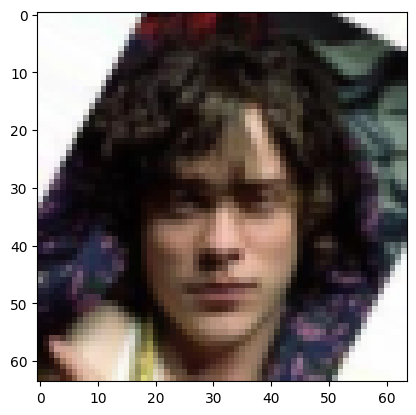

In [30]:
plt.imshow(images[1].permute(1, 2, 0))
plt.show()

In [25]:
for batch in dataloader2:
    images, labels = batch

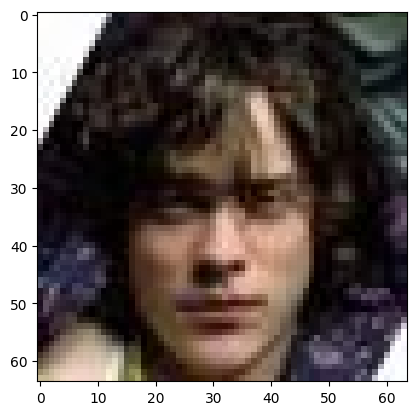

In [28]:
plt.imshow(images[1].permute(1, 2, 0))
plt.show()

In [8]:
from data import parse_celeba_attr_file

filenames, classnames, labels = parse_celeba_attr_file('data/CelebA/list_attr_celeba.txt')